<a href="https://colab.research.google.com/github/Pratzybha/CS252-OS-PROJECT/blob/main/soft_computing_CP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing essential Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Data augmentation
from sklearn.preprocessing import LabelEncoder #Categorical to numerical reprentation
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

#  Extracting frames and labelling them for training


Image: video_file1_0_1.jpg  Label: 1
Image: video_file1_75_1.jpg  Label: 1
Image: video_file1_150_1.jpg  Label: 1
Image: video_file1_225_1.jpg  Label: 1
Image: video_file1_300_1.jpg  Label: 1


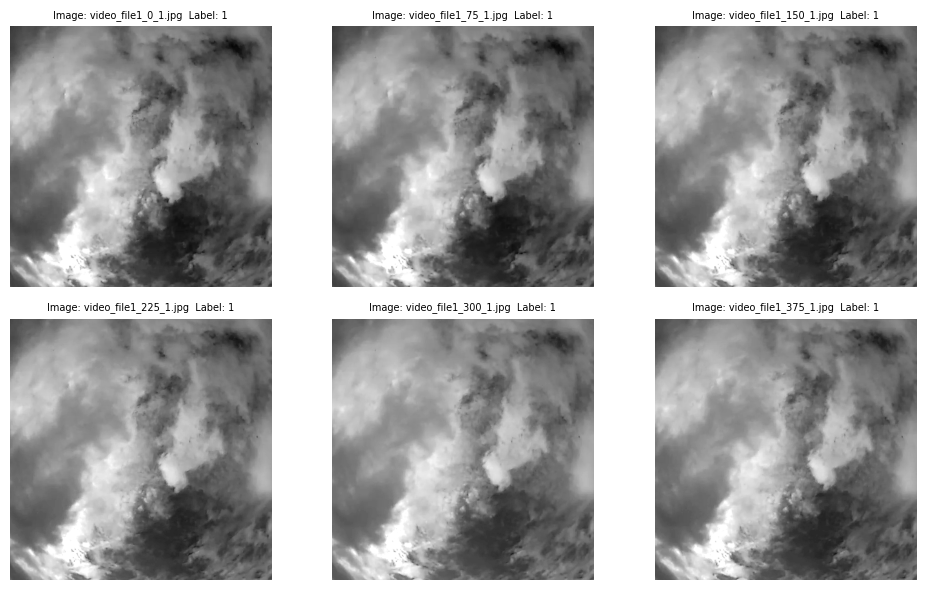

In [ ]:

def process_videos_train(video_path, output_folder, crop_percent, brightness_thresholds):
    image_data = {}  # Dictionary to hold image names and labels

    cap = cv2.VideoCapture(video_path) #Read the video frame by frame

    frame_count = 0
    while True:
        ret, frame = cap.read() #Reads the next frame from the video and returns two values
        if not ret:
            break

        if frame_count % (3 * cap.get(cv2.CAP_PROP_FPS)) == 0:  # Extract every 3 seconds

            # Crop
            height, width = frame.shape[:2]
            crop_amount = int(crop_percent * min(height, width))
            frame = frame[crop_amount:-crop_amount, crop_amount:-crop_amount] #Crops the frame by the calculated amount from all sides using array slicing in NumPy.

            # Greyscale conversion
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Brightness Calculation
            avg_brightness = gray_frame.mean()

            # Labeling
            if avg_brightness < brightness_threshold1:
                label = 1
            elif avg_brightness < brightness_threshold2:
                label = 2
            else:
                label =  3

            # Save image in 'test' folder
            output_filename = f"{os.path.splitext(os.path.basename(video_path))[0]}_{frame_count}_{label}.jpg"
            output_path = os.path.join(output_folder, "train", output_filename)  # Store in 'train'
            os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create 'test' folder if needed
            cv2.imwrite(output_path, gray_frame)

            # Add to dictionary
            image_data[output_filename] = label

        frame_count += 1

    cap.release()
    return image_data


# Parameters
output_folder = "/content/drive/MyDrive/soft computing"
crop_percent = 0.2
brightness_threshold1 = 170
brightness_threshold2 = 181

# Get video path from the user
video_path = "/content/drive/MyDrive/soft computing/video_file1.avi"

# Process the video
image_data_train = process_videos_train(video_path, output_folder, crop_percent, [brightness_threshold1, brightness_threshold2])

# Print the first 6 images and labels
counter = 0
for filename, label in image_data_train.items():
    print(f"Image: {filename}  Label: {label}")
    counter += 1
    if counter >= 5:
        break

# Plot the first 6 images
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))
axes = axes.flatten()

counter = 0
for i, (filename, label) in enumerate(image_data_train.items()):
    if counter >= 6:
        break

    image_path = os.path.join(output_folder, "train", filename)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Image: {filename}  Label: {label}",fontsize=7)
    axes[i].axis('off')

    counter += 1

plt.tight_layout()
plt.show()


Brightness values: [164.19937849633487, 164.0367085021219, 164.1509150752315, 164.04780635127315, 164.05585997781637, 164.16533142843363, 164.22247540509258, 164.35036892361111, 164.38525993441357, 164.45442708333334, 164.6979618778935, 164.81310281635803, 164.99787205825618, 165.1202950183256, 165.2493851273148, 165.38099802276236, 165.49711853780863, 165.65656647858796, 165.8186969521605, 165.8245804398148, 165.9805862991898, 166.19075520833334, 166.3678294994213, 166.5328414351852, 166.834774064429, 166.980037736304, 167.18461853780863, 167.4236744068287, 167.64076967592592, 167.7909221884645, 168.05444034529322, 168.20133162133487, 168.49250096450618, 168.84447337962962, 169.067684220679, 169.29429494598764, 169.5863293306327, 169.92570288387347, 170.22041377314815, 170.54899389949847, 170.85078185281637, 171.21736955054013, 171.732120466821, 172.08890034239968, 172.53124397183643, 172.8712112991898, 173.4914912471065, 174.02305471161264, 174.4759174864969, 175.0081530912423, 175.5

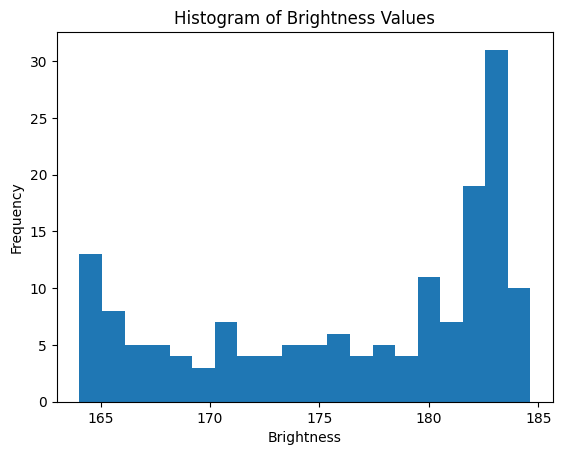

In [ ]:
# prompt: print brightness values of all images as a list and plot the histogram

import matplotlib.pyplot as plt
# Extract brightness values
brightness_values = []
for filename, label in image_data_train.items():
    image_path = os.path.join(output_folder, "train", filename)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    brightness_values.append(img.mean())

# Print brightness values
print("Brightness values:", brightness_values)

# Plot histogram
plt.hist(brightness_values, bins=20)
plt.xlabel("Brightness")
plt.ylabel("Frequency")
plt.title("Histogram of Brightness Values")
plt.show()


In [ ]:

# Count label occurrences
label_counts = {}
for filename, label in image_data_train.items():
    if label not in label_counts:
        label_counts[label] = 0
    label_counts[label] += 1

# Print the label counts
print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")
print(image_data_train)
print

Label Counts:
1: 38
2: 60
3: 62
{'video_file1_0_1.jpg': 1, 'video_file1_75_1.jpg': 1, 'video_file1_150_1.jpg': 1, 'video_file1_225_1.jpg': 1, 'video_file1_300_1.jpg': 1, 'video_file1_375_1.jpg': 1, 'video_file1_450_1.jpg': 1, 'video_file1_525_1.jpg': 1, 'video_file1_600_1.jpg': 1, 'video_file1_675_1.jpg': 1, 'video_file1_750_1.jpg': 1, 'video_file1_825_1.jpg': 1, 'video_file1_900_1.jpg': 1, 'video_file1_975_1.jpg': 1, 'video_file1_1050_1.jpg': 1, 'video_file1_1125_1.jpg': 1, 'video_file1_1200_1.jpg': 1, 'video_file1_1275_1.jpg': 1, 'video_file1_1350_1.jpg': 1, 'video_file1_1425_1.jpg': 1, 'video_file1_1500_1.jpg': 1, 'video_file1_1575_1.jpg': 1, 'video_file1_1650_1.jpg': 1, 'video_file1_1725_1.jpg': 1, 'video_file1_1800_1.jpg': 1, 'video_file1_1875_1.jpg': 1, 'video_file1_1950_1.jpg': 1, 'video_file1_2025_1.jpg': 1, 'video_file1_2100_1.jpg': 1, 'video_file1_2175_1.jpg': 1, 'video_file1_2250_1.jpg': 1, 'video_file1_2325_1.jpg': 1, 'video_file1_2400_1.jpg': 1, 'video_file1_2475_1.jpg': 1

<function print>

# **Processing second video for test cases**

In [ ]:
def process_videos_test(video_path, output_folder, crop_percent, brightness_thresholds):
    image_data = {}
    cap = cv2.VideoCapture(video_path)

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % (10 * cap.get(cv2.CAP_PROP_FPS)) == 0:  # Extract every 10 seconds

            # Crop
            height, width = frame.shape[:2]
            crop_amount = int(crop_percent * min(height, width))
            frame = frame[crop_amount:-crop_amount, crop_amount:-crop_amount]


            # Greyscale conversion
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            # Brightness Calculation
            avg_brightness = gray_frame.mean()



            # Save image in 'test' folder
            output_filename = f"{os.path.splitext(os.path.basename(video_path))[0]}_{frame_count}_{label}.jpg"
            output_path = os.path.join(output_folder, "test", output_filename)  # Store in 'test'
            os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Create 'test' folder if needed
            cv2.imwrite(output_path, gray_frame)


        # Add to dictionary
            image_data[output_filename] = label

        frame_count += 1

    cap.release()
    return image_data



# Parameters
output_folder = "/content/drive/MyDrive/soft computing"  # Replace with your output folder
crop_percent = 0.2

# Get video path from the user
video_path = "/content/drive/MyDrive/soft computing/video_file2.avi"
# Process the video
image_data_test = process_videos_test(video_path, output_folder, crop_percent, [brightness_threshold1, brightness_threshold2])


# **Preprocessing and training of model**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Parameters
data_dir_train = "/content/drive/MyDrive/soft computing/train"
data_dir_test = "/content/drive/MyDrive/soft computing/test"
output_folder = "/content/drive/MyDrive/soft computing"
image_data = image_data_train
num_classes = 3
batch_size = 10
learning_rate = 0.001
num_epochs = 15
img_height = 224
img_width = 224

# Load Image Data from Dictionary

def load_image_data(data_dir, image_data, img_height, img_width):
    images = []
    labels = []
    for filename, label in image_data.items():
        filepath = os.path.join(data_dir, filename) #Constructs the complete path to the image file.
        img = tf.io.read_file(filepath)
        img = tf.io.decode_image(img, channels=1)  # Grayscale
        img = tf.image.resize(img, [img_height, img_width])
        img_array = img / 255.0  # Normalize
        images.append(img_array)
        labels.append(label)

    print("Number of Images Loaded:", len(images))  # Debugging
    print("Number of Labels:", len(labels))        # Debugging `


    return images, labels
# Function to train and evaluate models
def train_and_evaluate(num_hidden_layers):
    """Trains a model with the specified number of hidden layers and evaluates it.

    Args:
        num_hidden_layers: The number of hidden layers to use in the model.
    """

    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        # Add hidden layers dynamically based on num_hidden_layers
        *[layers.Dense(128, activation='relu') for _ in range(num_hidden_layers)],
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size)

    # Evaluate the model (add test data if you have it)
    test_loss, test_acc = model.evaluate(train_images, train_labels)  # Use test data if available

    return test_acc  # Return the accuracy

# Load and Train
train_images, train_labels = load_image_data(data_dir_train, image_data, img_height, img_width)
train_images = np.array(train_images)
train_labels = np.array(train_labels)



# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes)

# Parameters for tracking results
num_hidden_layers_list = [3, 4, 5]
accuracies = {}

# Train and evaluate models with different hidden layers
for num_hidden_layers in num_hidden_layers_list:
    accuracy = train_and_evaluate(num_hidden_layers)
    accuracies[num_hidden_layers] = accuracy

# Print the results
print("Results:")
for num_hidden_layers, accuracy in accuracies.items():
    print(f"Model with {num_hidden_layers} hidden layers: Accuracy = {accuracy:.4f}")


Number of Images Loaded: 160
Number of Labels: 160
Epoch 1/15


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (10, 1) and (10, 3) are incompatible


In [ ]:
# prompt: convert string labels to integers

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder on the string labels
le.fit(['level 1', 'level 2', 'level 3'])

# Transform the string labels into integers
train_labels = le.transform(train_labels)


In [ ]:
# Plotting Accuracy and Loss
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')


plt.tight_layout()
plt.show()


In [ ]:

# Model Summary
model.summary()

In [ ]:
import numpy as np

def predict_and_print(model, data_dir_test, img_height, img_width):
    test_filenames = os.listdir(os.path.join(data_dir_test))
    print("Number of Test Images:", len(test_filenames))

    images = []
    for filename in test_filenames:
        filepath = os.path.join(data_dir_test, filename)
        img = tf.io.read_file(filepath)
        img = tf.io.decode_image(img, channels=1)
        img = tf.image.resize(img, [img_height, img_width])
        img_array = img / 255.0
        images.append(img_array)

    test_images = tf.stack(images, axis=0)
    print("Shape of Test Images Tensor:", test_images.shape)
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Print Predictions
    for i in range(len(test_filenames)):
        print(f"Image: {test_filenames[i]}, Predicted Label: {predicted_classes[i]}")

# Example Usage
predict_and_print(model, data_dir_test, img_height, img_width)  # Assuming your model is loaded



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_print_and_plot(model, data_dir_test, img_height, img_width):
    test_filenames = os.listdir(os.path.join(data_dir_test))
    print("Number of Test Images:", len(test_filenames))

    images = []
    for filename in test_filenames:
        filepath = os.path.join(data_dir_test, filename)
        img = tf.io.read_file(filepath)
        img = tf.io.decode_image(img, channels=1)
        img = tf.image.resize(img, [img_height, img_width])
        img_array = img / 255.0
        images.append(img_array)

    # ... (Code for loading and preprocessing images - same as before) ...

    test_images = tf.stack(images, axis=0)
    print("Shape of Test Images Tensor:", test_images.shape)
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)

    # Printing Predictions + Plotting
    num_images_per_category = 2
    num_rows, num_cols = 3, 2
    for label in range(num_classes):
        indices = np.where(predicted_classes == label)[0][:num_images_per_category]

        if len(indices) > 0:
            # Print in a single line
            print("Images:", ", ".join(test_filenames[i] for i in indices), end="; ")
            print("Predictions:", ", ".join(str(predicted_classes[i]) for i in indices))

            # Plotting
            fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 12))
            axs = axs.flatten()

            for i, idx in enumerate(indices):
                img = test_images[idx]
                img_numpy = img.numpy()
                axs[i].imshow(img_numpy.squeeze(), cmap='gray')
                axs[i].set_title(f"Predicted: {predicted_classes[idx]}")

            for i in range(len(indices), num_rows * num_cols):
                axs[i].axis('off')

            plt.tight_layout()
            plt.show()

# Example Usage
predict_print_and_plot(model, data_dir_test, img_height, img_width)
